# 資料預處理

In [22]:
from keras.utils import np_utils
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt


from my_plot import plot_single, plot_batch, show_train_history, plot_images_labels_prediction, plot_image, plot_value_array


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

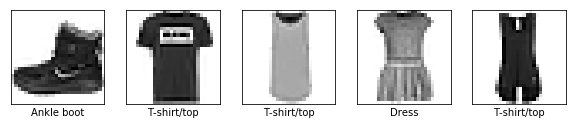

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plot_batch(train_images, train_labels,class_names,5)

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

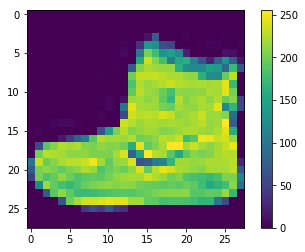

In [6]:
plot_single(train_images[0])

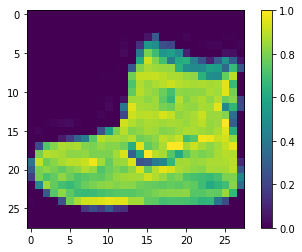

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0
plot_single(train_images[0])

# 建立模型

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
import tensorflow as tf

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation=tf.nn.relu, kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation=tf.nn.softmax, kernel_initializer='normal'))

In [10]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
train_history = model.fit(train_images, train_labels, validation_split=0.2, 
                         epochs=10, batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.7081 - acc: 0.7538 - val_loss: 0.4740 - val_acc: 0.8334
Epoch 2/10
 - 1s - loss: 0.4794 - acc: 0.8331 - val_loss: 0.4213 - val_acc: 0.8493
Epoch 3/10
 - 1s - loss: 0.4305 - acc: 0.8465 - val_loss: 0.3862 - val_acc: 0.8629
Epoch 4/10
 - 1s - loss: 0.4000 - acc: 0.8565 - val_loss: 0.3724 - val_acc: 0.8671
Epoch 5/10
 - 1s - loss: 0.3792 - acc: 0.8628 - val_loss: 0.3566 - val_acc: 0.8727
Epoch 6/10
 - 1s - loss: 0.3670 - acc: 0.8668 - val_loss: 0.3520 - val_acc: 0.8751
Epoch 7/10
 - 1s - loss: 0.3555 - acc: 0.8718 - val_loss: 0.3410 - val_acc: 0.8770
Epoch 8/10
 - 1s - loss: 0.3459 - acc: 0.8744 - val_loss: 0.3364 - val_acc: 0.8778
Epoch 9/10
 - 1s - loss: 0.3402 - acc: 0.8757 - val_loss: 0.3255 - val_acc: 0.8818
Epoch 10/10
 - 1s - loss: 0.3318 - acc: 0.8786 - val_loss: 0.3279 - val_acc: 0.8839


# 以圖形顯示訓練過程

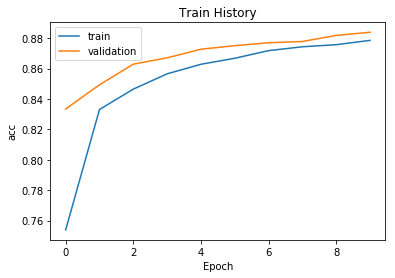

In [13]:
show_train_history(train_history,'acc','val_acc')

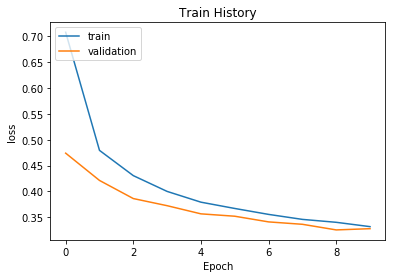

In [14]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [15]:
scores = model.evaluate(test_images, test_labels)
print("Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 0s 15us/step
Accuracy of testing data = 87.2%


# 進行預測

In [16]:
prediction=model.predict_classes(test_images)

In [17]:
prediction

array([9, 2, 1, ..., 8, 1, 5])

In [18]:
predictions = model.predict(test_images)
predictions[0]

array([1.8340049e-06, 1.1416406e-07, 4.2720371e-06, 3.5916412e-07,
       2.3398163e-06, 1.5513621e-01, 3.6847709e-06, 9.9230975e-02,
       8.4941661e-05, 7.4553531e-01], dtype=float32)

In [19]:
np.argmax(predictions[0])

9

In [20]:
test_labels[0]

9

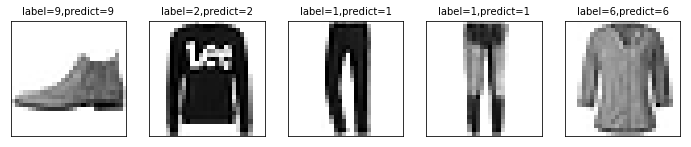

In [21]:
plot_images_labels_prediction(test_images,test_labels, prediction,idx=0,num=5)

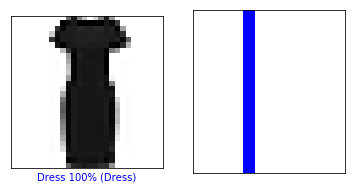

In [23]:
i = 1393
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images, class_names)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

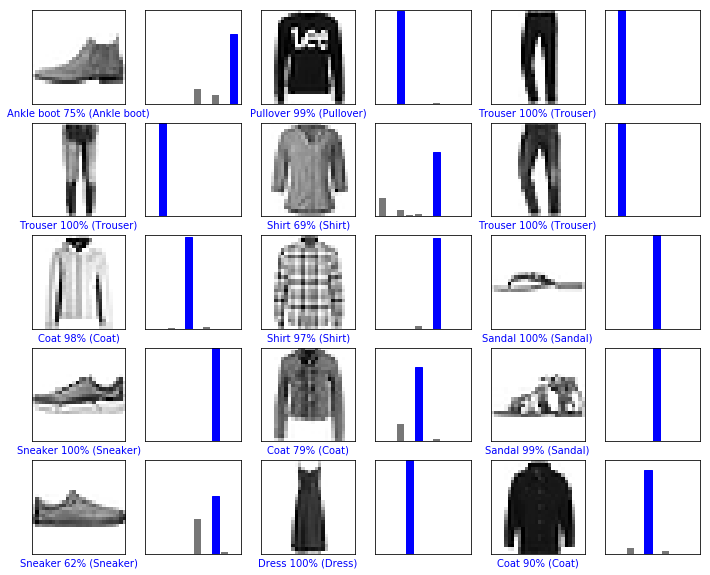

In [24]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images, class_names)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


# confusion matrix

In [25]:
import pandas as pd
pd.crosstab(test_labels,prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,809,0,18,44,5,1,112,0,11,0
1,3,963,0,25,4,0,3,0,2,0
2,12,2,731,12,156,0,83,0,4,0
3,17,5,9,904,30,1,31,0,3,0
4,0,0,74,36,835,0,52,0,3,0
5,0,0,0,0,0,960,0,27,2,11
6,119,1,80,38,90,0,655,0,17,0
7,0,0,0,0,0,23,0,965,0,12
8,2,1,2,3,5,3,6,7,971,0


In [26]:
df = pd.DataFrame({'label':test_labels, 'predict':prediction})
df[:2]

,label,predict
0,9,9
1,2,2


In [29]:
df[(df.label==3)&(df.predict==0)]

,label,predict
460,3,0
753,3,0
979,3,0
2021,3,0
2312,3,0
2688,3,0
2721,3,0
3209,3,0
3322,3,0
3779,3,0


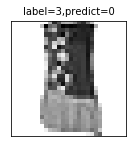

In [30]:
plot_images_labels_prediction(test_images,test_labels,prediction,idx=460,num=1)

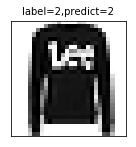

In [31]:
plot_images_labels_prediction(test_images,test_labels,prediction,idx=1,num=1)

# 針對位移過的圖進行預測

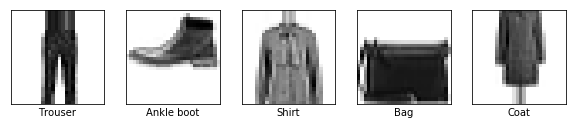

In [31]:
from my_plot import generate_shift_fashion_mnist_data

shift_img, shift_img_label = generate_shift_fashion_mnist_data(10000)
plot_batch(shift_img, shift_img_label,class_names,5)

In [32]:
scores = model.evaluate(shift_img, shift_img_label)
print("Accuracy of generated shift data = {:2.1f}%".format(scores[1]*100.0))

10000/10000 [==============================] - 0s 14us/step
Accuracy of generated shift data = 64.6%
